In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [200]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date=[result.date for result in session.query(Measurement)]
last=max(last_date)
print(last)

# 1 year ago is 2016-08-23

# Perform a query to retrieve the data and precipitation scores

precipitation_data=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").order_by(Measurement.date).all()
precipitation_data

# # Save the query results as a Pandas DataFrame and set the index to the date column
# conn=engine.connect()
# df=pd.read_sql('select Measurement.date, Measurement.prcp from Measurement where Measurement.date>="2016-08-23"', conn)
# df=df.set_index('date')

# # Sort the dataframe by date
# df=df.sort_values(by=['date'])
# df.head()
# # Use Pandas Plotting with Matplotlib to plot the data
# df.plot(kind='bar', color='blue', figsize=(40,10))
# x_axis=np.arange(len(df))
# tick_locations=[value for value in x_axis]
# plt.xticks(tick_locations, df.index.values, rotation=90)
# plt.ylabel('Precipitation')
# plt.xlabel('Date(from 8/23/16 to 8/23/17)')
# plt.title("Rainfall in Hawaii")
# plt.show()

2017-08-23


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [201]:
output_list=[]
for each_result in precipitation_data:
    output={}
    output['date']=each_result[0]
    output['preciptation']=each_result[1]
    output_list.append(output)
output_list
# return jsonify(output_list)

[{'date': '2016-08-23', 'preciptation': 0.0},
 {'date': '2016-08-23', 'preciptation': 0.15},
 {'date': '2016-08-23', 'preciptation': 0.05},
 {'date': '2016-08-23', 'preciptation': None},
 {'date': '2016-08-23', 'preciptation': 0.02},
 {'date': '2016-08-23', 'preciptation': 1.79},
 {'date': '2016-08-23', 'preciptation': 0.7},
 {'date': '2016-08-24', 'preciptation': 0.08},
 {'date': '2016-08-24', 'preciptation': 2.15},
 {'date': '2016-08-24', 'preciptation': 2.28},
 {'date': '2016-08-24', 'preciptation': None},
 {'date': '2016-08-24', 'preciptation': 1.22},
 {'date': '2016-08-24', 'preciptation': 2.15},
 {'date': '2016-08-24', 'preciptation': 1.45},
 {'date': '2016-08-25', 'preciptation': 0.08},
 {'date': '2016-08-25', 'preciptation': 0.08},
 {'date': '2016-08-25', 'preciptation': 0.0},
 {'date': '2016-08-25', 'preciptation': 0.0},
 {'date': '2016-08-25', 'preciptation': 0.21},
 {'date': '2016-08-25', 'preciptation': 0.06},
 {'date': '2016-08-25', 'preciptation': 0.11},
 {'date': '2016-0

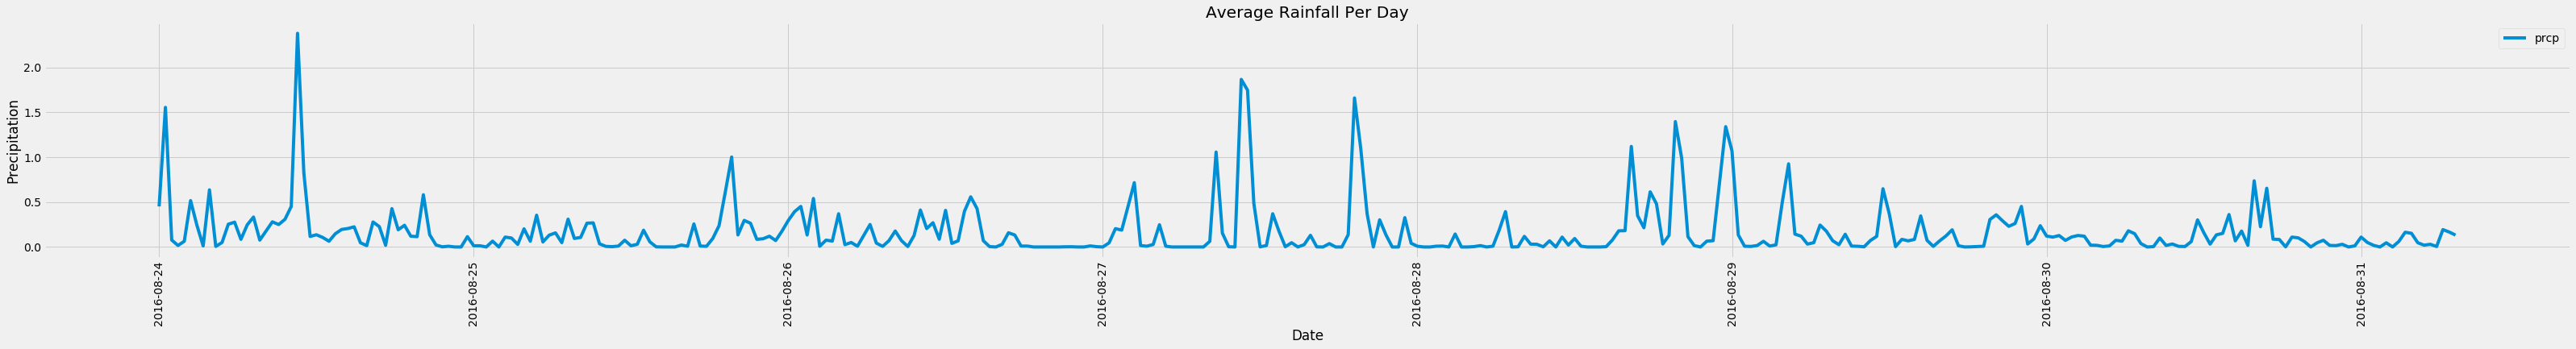

In [99]:
conn=engine.connect()
df1=pd.read_sql('select Measurement.date, Measurement.prcp from Measurement where Measurement.date>="2016-08-23"', conn)
average_df=df1.groupby('date').mean()
average_df.head()
average_df=average_df.reset_index()


rain_plot=average_df.plot(kind="line", figsize=(50,5))
rain_plot.set_xticklabels(average_df["date"], rotation='vertical')
plt.title("Average Rainfall Per Day")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.show()

In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

prcp                                                       
           count      mean       std   min     25%    50%     75%   max
date                                                                   
2016-08-23   6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24   6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25   7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26   6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27   5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18
...          ...       ...       ...   ...     ...    ...     ...   ...
2017-08-19   3.0  0.030000  0.051962  0.00  0.0000  0.000  0.0450  0.09
2017-08-20   2.0  0.005000  0.007071  0.00  0.0025  0.005  0.0075  0.01
2017-08-21   3.0  0.193333  0.317700  0.00  0.0100  0.020  0.2900  0.56
2017-08-22   3.0  0.166667  0.288675  0.00  0.0000  0.000  0.2500  0.50
2017-08-23   4.0  0.132500  0.215000  0.00  0.0000  0.040  0.1725  0.45

[366 rows x 8 columns]

In [107]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(Measurement.station)
sc=station_count.distinct()
stns=(sc.count())
print(f"There are {stns} stations in this dataset.")

There are 9 stations in this dataset.


In [140]:
# What are the most active stations? (i.e. what stations have the most rows)?
stations_df=pd.read_sql('select station, count(station) from Measurement group by station order by count(station) DESC', conn)
stations_df


# List the stations and the counts in descending order.


,station,count(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [132]:
print(f"Station {stations_df.station[0]} has the most observations")

Station USC00519281 has the most observations


In [240]:
# turn stations_df into a dictionary

station_count=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()
station_count
    
stations_output_list=[]
for each in station_count:
    output={}
    output['Station']=each[0]
    output['Number of Observations']= each[1]
    stations_output_list.append(output)
stations_output_list

[{'Station': 'USC00518838', 'Number of Observations': 511},
 {'Station': 'USC00517948', 'Number of Observations': 1372},
 {'Station': 'USC00511918', 'Number of Observations': 1979},
 {'Station': 'USC00514830', 'Number of Observations': 2202},
 {'Station': 'USC00516128', 'Number of Observations': 2612},
 {'Station': 'USC00519523', 'Number of Observations': 2669},
 {'Station': 'USC00513117', 'Number of Observations': 2709},
 {'Station': 'USC00519397', 'Number of Observations': 2724},
 {'Station': 'USC00519281', 'Number of Observations': 2772}]

In [151]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station = "USC00519281"
lowest=session.query(func.min(Measurement.tobs).filter(Measurement.station == 'USC00519281'))
for each in lowest:
    print(f'The lowest observed temperature at Station {station} was {each[0]}')
    
    
highest=session.query(func.max(Measurement.tobs).filter(Measurement.station == station))
for each in highest:
    print(f'The highest observed temperature at Station {station} was {each[0]}')
    

avg=session.query(func.avg(Measurement.tobs).filter(Measurement.station == station))
for each in avg:
    print(f'The average observed temperature at Station {station} was {each[0]}')
        

The lowest observed temperature at Station USC00519281 was 54.0
The highest observed temperature at Station USC00519281 was 85.0
The average observed temperature at Station USC00519281 was 71.66378066378067


In [162]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps=pd.read_sql('select station, count(tobs) from Measurement where tobs is not null and date > "2016-08-23" group by station order by count(tobs) DESC', conn)
temps

,station,count(tobs)
0,USC00519397,360
1,USC00519281,351
2,USC00516128,348
3,USC00513117,342
4,USC00519523,336
5,USC00514830,304
6,USC00517948,182


In [250]:
temp_year=session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519397").filter(Measurement.date>"2016-08-23").all()
temp_year

[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 80.0),
 ('2016-10-

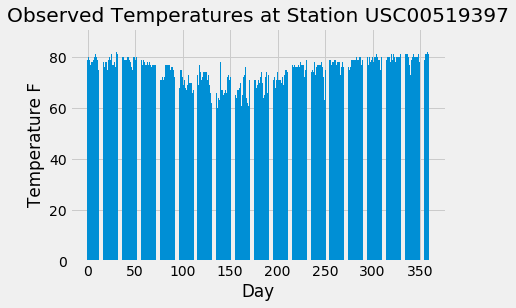

In [198]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp=pd.read_sql('select tobs, date from Measurement where station="USC00519397" AND date > "2016-08-23"', conn )
year_temp

x_axis=np.arange(len(year_temp))
tick_locations=[value for value in x_axis]

plt.bar(x_axis, year_temp.tobs)
plt.title("Observed Temperatures at Station USC00519397")
plt.xlabel("Day")
plt.ylabel("Temperature F")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002234D1BBD48>]],
      dtype=object)

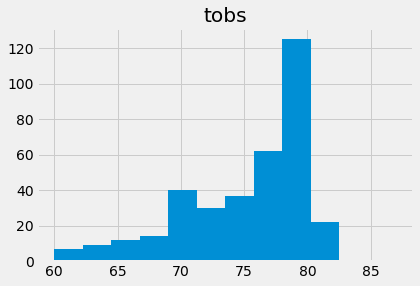

In [195]:
year_temp.hist(column='tobs', bins=12,)

## Bonus Challenge Assignment

In [251]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [252]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-06-01', '2016-09-20'))

[(64.0, 77.03824362606233, 84.0)]


In [259]:
#see how the answer is returned and change it to a dictionary
calcs = calc_temps('2016-08-23', '2017-01-01')

output={}
output['Minimum, Average, Maximum Temperature']=calcs[0]

output

{'Minimum, Average, Maximum Temperature': (60.0, 75.29678188319429, 84.0)}

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [23]:
# Plot the daily normals as an area plot with `stacked=False`
